1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
n=2000
mu=[0,0]
sigma=[1,3]
x=np.zeros((3,n))
x[0]=np.random.normal(loc=mu[0], scale=sigma[0], size=n)
x[1]=np.random.normal(loc=mu[1], scale=sigma[1], size=n)+x[0]
x[2]=2*x[0]+x[1]#+np.random.normal(loc=0, scale=1, size=n)

x

array([[ 8.07270444e-01, -3.24488152e-01,  1.25557023e-01, ...,
        -1.33564631e+00, -6.94676579e-02,  2.52318896e+00],
       [ 5.48539869e-01, -9.79553806e-01, -3.58768826e-01, ...,
        -6.22217021e-03,  7.35489748e-01,  4.24089895e+00],
       [ 2.16308076e+00, -1.62853011e+00, -1.07654780e-01, ...,
        -2.67751480e+00,  5.96554432e-01,  9.28727688e+00]])

(array([  2.,   6.,  40., 167., 463., 599., 433., 223.,  57.,  10.]),
 array([-18.14708833, -14.88068467, -11.614281  ,  -8.34787734,
         -5.08147367,  -1.81507001,   1.45133366,   4.71773732,
          7.98414099,  11.25054465,  14.51694832]),
 <BarContainer object of 10 artists>)

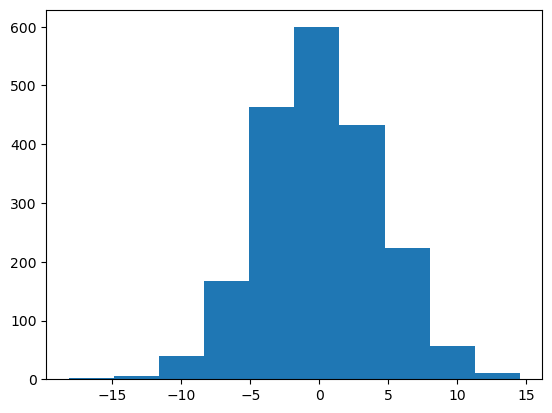

In [3]:
plt.hist(x[2])

In [4]:
#%matplotlib notebook

l, V = la.eig(np.cov(x))
print('l', l)
print('V', V)

l [ 2.78318940e+01+0.j -2.20296802e-16+0.j  1.97535163e+00+0.j]
V [[-0.1109179  -0.81649658  0.56659558]
 [-0.58301713 -0.40824829 -0.70244171]
 [-0.80485293  0.40824829  0.43074945]]


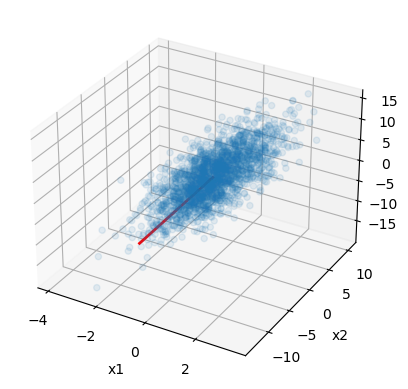

In [5]:
scale_factor=0.5

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[0],x[1],x[2], alpha=0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

for li, vi in zip(np.real_if_close(l), V.T):
    ax.plot([0, li*scale_factor*vi[0]],[0,li*scale_factor*vi[1]],[0,li*scale_factor*vi[2]], 'r-', lw=2)

    plt.show()

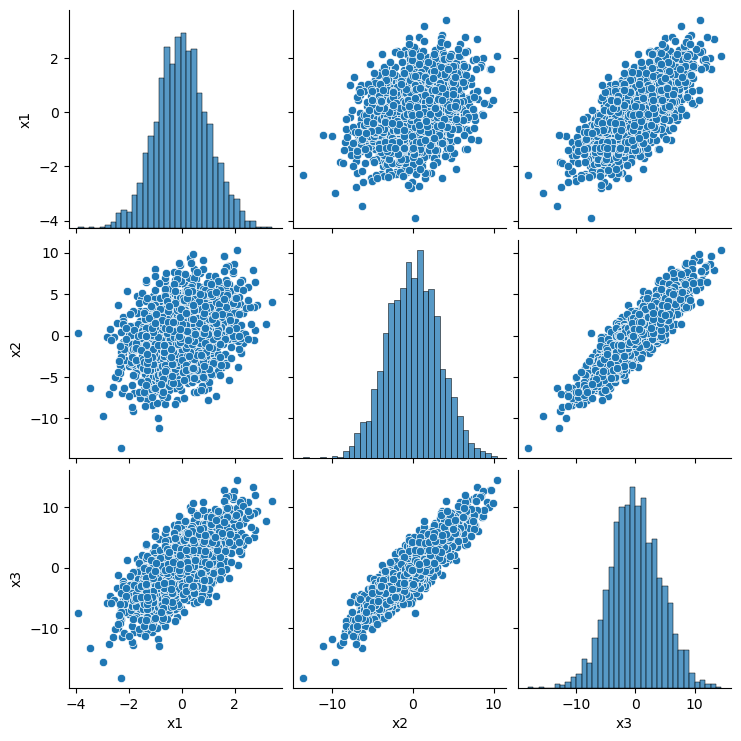

In [6]:
df=pd.DataFrame(x.T, columns=['x1','x2','x3'])
sns.pairplot(df)

In [7]:
print('Cov matrix')
print(np.cov(x),'\n')
print('Eigenvalues')
print(np.real_if_close(l), '\n')
print('Eigenvectors')
print(V)

Cov matrix
[[ 0.97655791  1.0136154   2.96673121]
 [ 1.0136154  10.43499724 12.46222804]
 [ 2.96673121 12.46222804 18.39569046]] 

Eigenvalues
[ 2.78318940e+01 -2.20296802e-16  1.97535163e+00] 

Eigenvectors
[[-0.1109179  -0.81649658  0.56659558]
 [-0.58301713 -0.40824829 -0.70244171]
 [-0.80485293  0.40824829  0.43074945]]


In [8]:
U, spectrum, Vt = la.svd(x)

print('Eigenvectors')
print(U, '\n')
print('Singular Values/ Eigenvalues')
print(spectrum, spectrum**2/(n-1),'\n')
print('Other stuff')
print(Vt, '\n')

Eigenvectors
[[-0.11093646  0.56659195 -0.81649658]
 [-0.58299412 -0.70246081 -0.40824829]
 [-0.80486704  0.43072308  0.40824829]] 

Singular Values/ Eigenvalues
[2.35889322e+02 6.28418239e+01 8.26932016e-15] [2.78358041e+01 1.97553518e+00 3.42079319e-32] 

Other stuff
[[-9.11590079e-03  8.13017678e-03  1.19496315e-03 ...  9.77934382e-03
  -3.82054896e-03 -4.33565869e-02]
 [ 1.59727061e-02 -3.13803313e-03  4.40457043e-03 ... -3.03247571e-02
  -4.75897668e-03  3.89994692e-02]
 [-5.65399595e-01 -1.40702185e-01  1.35222611e-03 ... -1.59553306e-02
  -1.68532593e-03  3.01026865e-02]
 ...
 [ 1.09626677e-02  4.88363917e-03  3.42303185e-02 ...  9.98460701e-01
  -1.62112674e-04  2.60248178e-03]
 [-3.02185013e-04  5.39202224e-03  3.42580072e-03 ... -1.60838203e-04
   9.99957279e-01  1.22942236e-04]
 [-2.29610543e-02  2.10066725e-02 -6.00754751e-02 ...  2.52061079e-03
   1.17235260e-04  9.94866497e-01]] 



More than 99% of the information is retained in the space yielded by the first and the last eigenvector

In [9]:
lambdas=np.real_if_close(np.diag(l))
(lambdas[0,0]+lambdas[2,2])/np.trace(lambdas)

1.0

In [10]:
xp=np.dot(V.T, x)
xpp=np.dot(V,xp)

In [11]:
xpp.shape, x.shape

((3, 2000), (3, 2000))

Simplified data with reduced dimensionality: x1 ranges ina very small interval and can be neglected

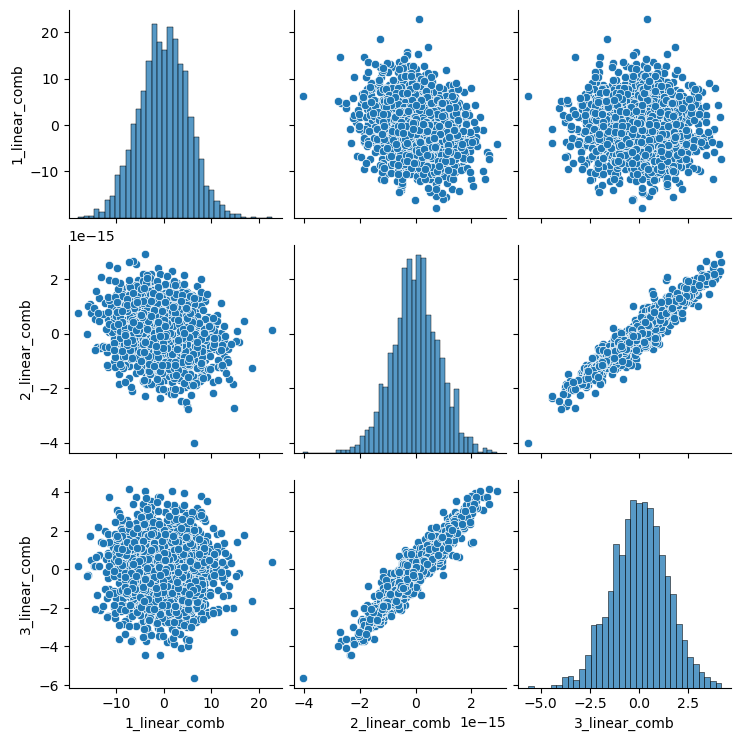

In [12]:
dfp=pd.DataFrame(xp.T, columns=['1_linear_comb','2_linear_comb','3_linear_comb'])
sns.pairplot(dfp)

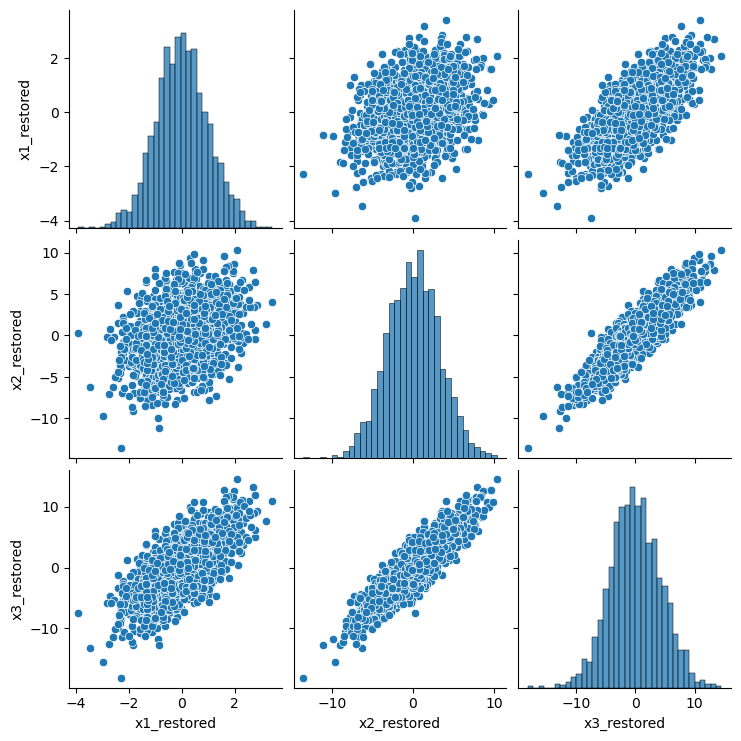

In [13]:
dfpp=pd.DataFrame(xpp.T, columns=['x1_restored','x2_restored','x3_restored'])
sns.pairplot(dfpp)

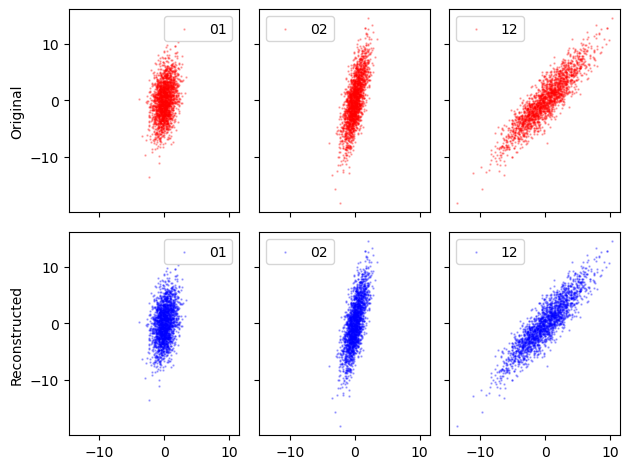

In [14]:
fig,ax=plt.subplots(nrows=2,ncols=3, sharex=True, sharey=True)


ax[0][0].scatter(x[0],x[1], color='r', alpha=0.3, s=0.5, label='01')
ax[0][1].scatter(x[0],x[2], color='r', alpha=0.3, s=0.5, label='02')
ax[0][2].scatter(x[1], x[2], color='r', alpha=0.3, s=0.5, label='12')

ax[1][0].scatter(xpp[0],xpp[1], color='b', alpha=0.3, s=0.5, label='01')
ax[1][1].scatter(xpp[0],xpp[2], color='b', alpha=0.3, s=0.5, label='02')
ax[1][2].scatter(xpp[1], xpp[2], color='b', alpha=0.3, s=0.5, label='12')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()

ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()

ax[1][0].set_ylabel( 'Reconstructed', rotation=90, horizontalalignment='center')
ax[0][0].set_ylabel('Original', rotation=90, horizontalalignment='center')

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.tight_layout()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [15]:
noise=np.random.normal(loc=0, scale=1/50, size=(10,n))
df_n=pd.DataFrame(noise.T)

dff=pd.concat([df,df_n], axis=1)
dff.describe()

,x1,x2,x3,0,1,2,3,4,5,6,7,8,9
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.014609,0.026932,0.056150,0.000937,0.000153,-0.000123,0.000251,0.000169,-0.000037,0.000489,-0.000358,0.000156,0.000487
std,0.988209,3.230325,4.289020,0.020158,0.019952,0.020443,0.019758,0.020204,0.019759,0.020085,0.020014,0.020278,0.019638
min,-3.904166,-13.552146,-18.147088,-0.079301,-0.072424,-0.067637,-0.058915,-0.072800,-0.061628,-0.063889,-0.071886,-0.062759,-0.067778
25%,-0.642372,-2.215606,-2.808862,-0.012604,-0.013490,-0.014043,-0.013229,-0.013311,-0.013080,-0.012969,-0.013677,-0.013752,-0.012868
50%,0.005260,0.008034,-0.076396,0.001133,0.000199,0.000136,-0.000313,0.000451,-0.000230,0.000311,-0.000013,0.000691,0.000608
75%,0.654866,2.231534,2.948021,0.014184,0.013852,0.013764,0.014400,0.014071,0.013686,0.013598,0.012805,0.014155,0.013307
max,3.410635,10.356635,14.516948,0.075111,0.058870,0.071554,0.061839,0.058871,0.072202,0.076133,0.069222,0.081850,0.063549


(13,)
(13, 13)


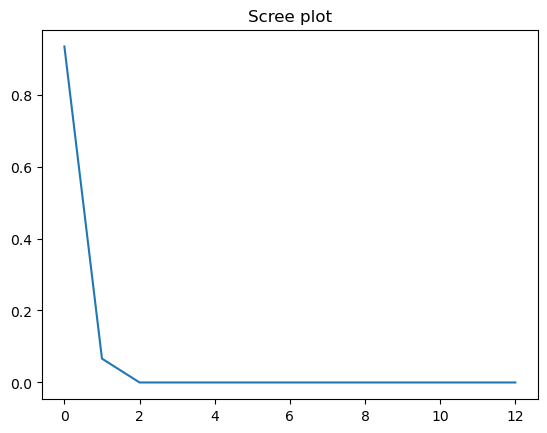

In [16]:
cov=np.cov(dff.T)
ll,VV=la.eig(cov)

print(ll.shape)
print(VV.shape)

plt.plot(np.real_if_close(ll)/np.sum(np.real_if_close(ll)))
plt.title('Scree plot')
plt.show()

In [17]:
xppp=np.dot(VV.T, dff.to_numpy().T)
xppp.shape

(13, 2000)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [18]:
data=np.loadtxt('/home/tom/data/magic04.data', delimiter=',', usecols=range(0,10))
data.shape

(19020, 10)

[6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322858e-04]
[[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.88001798e-01
  -5.19365739e-01 -8.33611268e-01]
 [ 3.807000

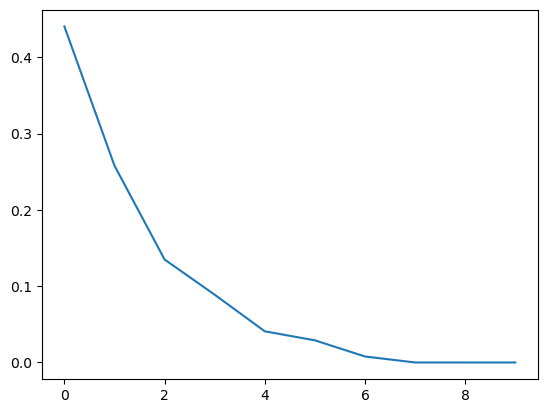

In [19]:
cov=np.cov(data.T)
lll,VVV=la.eig(cov)

print(np.real_if_close(lll))
print(VVV)
plt.plot(np.real_if_close(lll)/np.sum(np.real_if_close(lll)))

print(np.sum(np.real_if_close(lll)[0:5])/np.sum(np.real_if_close(lll)))

In [20]:
data_pca=np.dot(VVV.T, data.T)
df_data=pd.DataFrame(data_pca.T)

df_data.describe()


,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,-184.618459,70.506627,-26.018425,9.600751,-44.316033,-1.153998,-0.620566,-1.900520,-1.397013,0.095092
std,81.115913,62.079550,44.904155,36.424712,24.701969,20.823044,10.831901,0.293933,0.103617,0.019630
min,-525.988643,-404.502308,-552.127791,-67.378863,-132.227974,-209.556369,-150.132831,-3.216601,-1.878857,-0.056010
25%,-222.397996,42.220232,-43.711358,-12.871445,-59.736458,-12.054041,-4.564533,-2.086818,-1.459984,0.086323
50%,-172.865543,72.416157,-27.834924,1.924882,-35.918621,-0.802336,-0.861095,-1.896185,-1.384103,0.096357
75%,-129.559422,103.104147,-10.414344,21.099562,-26.358750,9.725631,3.599001,-1.714013,-1.321549,0.105598
max,3.470720,344.069291,404.391258,402.628840,40.029899,180.958203,75.382647,1.220588,-1.133014,0.186436


In [21]:
df_data_orig=pd.DataFrame(data)
df_data_orig.describe()


,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000
